# Neural Networks Learning

In this exercise, you will implement the backpropagation algorithm for neural networks and apply it to the task of hand-written digit recognition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import randint

# load MATLAB files
from scipy.io import loadmat
from scipy.optimize import fmin_cg

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Neutral Networks

### Visualizing the data

In [2]:
# Load the data
data = loadmat("ex4data1.mat")
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [3]:
X = data['X']
y = data['y']
print("X's shape: ", X.shape)
print("y's shape: ", y.shape)

X's shape:  (5000, 400)
y's shape:  (5000, 1)


In [4]:
def VisualizingTheData(X):
    # Number of hand writing number
    number_show = 100;
    m, n = X.shape;
    random_idx = randint(m, size=number_show)
    imv = np.empty((20,0))
    imag = []
    for i in range(number_show):
        im = np.reshape(X[random_idx[i]],(20,20)).T
        imv = np.append(imv,im,axis=1)
        if (i+1) % 10 == 0:
            imag.append(imv)
            imv = np.empty((20,0))
    image = np.concatenate((imag[:]),axis = 0)
    plt.imshow(image, cmap = 'gray')

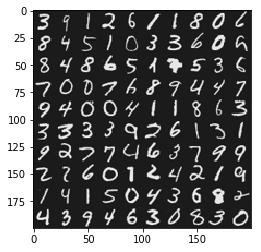

In [5]:
VisualizingTheData(X)

## Model representation 

In [6]:
# Load saved matrices from file
weights = loadmat("ex4weights.mat")
weights.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])

In [7]:
Theta1 = weights["Theta1"]
Theta2 = weights["Theta2"]

Neutral Network cost function

In [8]:
def sigmoid(z):
    return (1/ (1 + np.exp(-z)))

def sigmoidGradient(z):
    g_z = sigmoid(z);
    return sigmoid(z)*(1-sigmoid(z))

def nnCostFunction(theta, x, y, lamda = 0.1):
    theta1, theta2 = split(theta,[25*401])
    theta1 = np.reshape(theta1,(25,401))
    theta2 = np.reshape(theta2,(10,26))
    
    m = x.shape[0];
    
    x = np.c_[np.ones((m,1)), x];
    
    z2 = x.dot(theta1.T);
    a2 = sigmoid(z2);
    a2 = np.c_[np.ones((a2.shape[0], 1)), a2];
    
    z3 = a2.dot(theta2.T);
    a3 = sigmoid(z3);
    
    Y = np.zeros((m, 10));
    
    for i in range (m):
        Y[i, y[i] - 1] = 1;
    
    # Y: 5000 * 10, a3 : 5000 * 10
    J = np.sum( - Y * np.log(a3) - (1 - Y) * np.log(1 - a3) ) / m;
    J += np.sum(np.square(theta1[:, 1:])) * lamda / (2 * m) + np.sum(np.square(theta2[:, 1:])) * lamda / (2 * m);
    
    return J

def nnGradient(theta, x, y, lamda = 0.1):
    theta1, theta2 = split(theta,[25*401])
    theta1 = np.reshape(theta1,(25,401))
    theta2 = np.reshape(theta2,(10,26))
    
    m = x.shape[0];
    
    x = np.c_[np.ones((m,1)), x];
    
    z2 = x.dot(theta1.T);
    a2 = sigmoid(z2);
    a2 = np.c_[np.ones((a2.shape[0], 1)), a2];
    
    z3 = a2.dot(theta2.T);
    a3 = sigmoid(z3);
    
    Y = np.zeros((m, 10));
    
    for i in range (m):
        Y[i, y[i] - 1] = 1;
    
    delta3 = a3 - Y;
    # theta2 : 10 * 26
    # delta3 : 5000 *  10
    # sigmoidGradient(z2): 5000 x 401 * 401 x 25 = 5000 * 25
    # delta 2 : 5000 x 25
    # z3 : 5000 * 26 * 26 * 10 = 5000 * 10
    delta2 = delta3.dot(theta2[:, 1:]) * sigmoidGradient(z2);
    # 10 x 5000 * 5000 * 25 = 10 * 25
    theta2_grad = delta3.T.dot(a2) / m;
    theta1_grad = delta2.T.dot(x) / m;
    
    theta1_grad[:,1:] += lamda*theta1[:,1:]/m;
    theta2_grad[:,1:] += lamda*theta2[:,1:]/m;
    
    return np.append(theta1_grad.flatten(), theta2_grad.flatten())

#Predictions has to change a lot in order to do forward propagation and get the probabilities
def predictions(theta,x):
    theta1, theta2 = split(theta,[25*401])
    theta1 = np.reshape(theta1,(25,401))
    theta2 = np.reshape(theta2,(10,26))
    
    m = x.shape[0];
    
    x = np.c_[np.ones((m,1)), x];
    
    z2 = x.dot(theta1.T);
    a2 = sigmoid(z2);
    a2 = np.c_[np.ones((a2.shape[0], 1)), a2];
    
    z3 = a2.dot(theta2.T);
    a3 = sigmoid(z3);
    
    pred = np.argmax(a3, axis=1)
    return pred

def accuracy(pred,y):
    pred.shape = (pred.size,1)
    return np.mean((pred == y - 1))*100
    
def initializeTheta():
    eps = 0.1
    theta1 = rand(25,401)*2*eps-eps
    theta2 = rand(10,26)*2*eps-eps
    theta = append(theta1.flatten(),theta2.flatten())
    return theta


In [9]:
inTheta = initializeTheta()

lamda = 0.1
maxIterations = 30

theta = fmin_cg(nnCostFunction,inTheta,fprime = nnGradient,args=(X,y,lamda), maxiter = maxIterations,disp = 1)

# theta = np.c_[Theta1.reshape(1, -1), Theta2.reshape(1, -1)];

         Current function value: 0.437116
         Iterations: 30
         Function evaluations: 65
         Gradient evaluations: 65


In [10]:
pred = predictions(theta, X);

In [11]:
pred

array([9, 9, 9, ..., 8, 8, 8])

In [12]:
accuracy(pred, y)

94.260000000000005